# Awareness Level

https://books.google.ca/books?id=YWcLBAAAQBAJ&pg=PA60&lpg=PA60&dq=kde2d+log&source=bl&ots=7AB-RAoMqY&sig=gFaHSoQCoGMXrR9BTaLOdCs198U&hl=en&sa=X&ei=8mQDVPqtMsi4ggSRnILQDw&redir_esc=y#v=onepage&q=kde2d%20log&f=false

https://www.r-bloggers.com/5-ways-to-do-2d-histograms-in-r/

In [1]:
library("MASS")

In [2]:
library(data.table)
library(ggplot2)
library(latex2exp)

In [3]:
mypath <- "../../log/EmailURV-apathy-async"

In [4]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [5]:
thepath = list.dirs(mypath)[10]

In [6]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")

In [7]:
DF <- read.csv(file = filename, skip=12)

In [8]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [9]:
tempDF

,time,agent,k.core,state,degree
480,1,479,7,i,9


In [10]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [11]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [12]:
DT <- data.table(DF)

In [13]:
DT <- DT[DT$time == 50]

In [14]:
DT <- DT[DT$state == 's']

In [15]:
DT1 = DT[, sum(density), by=list(degree, k.core)]

In [16]:
DT1 <- DT1[-1,]

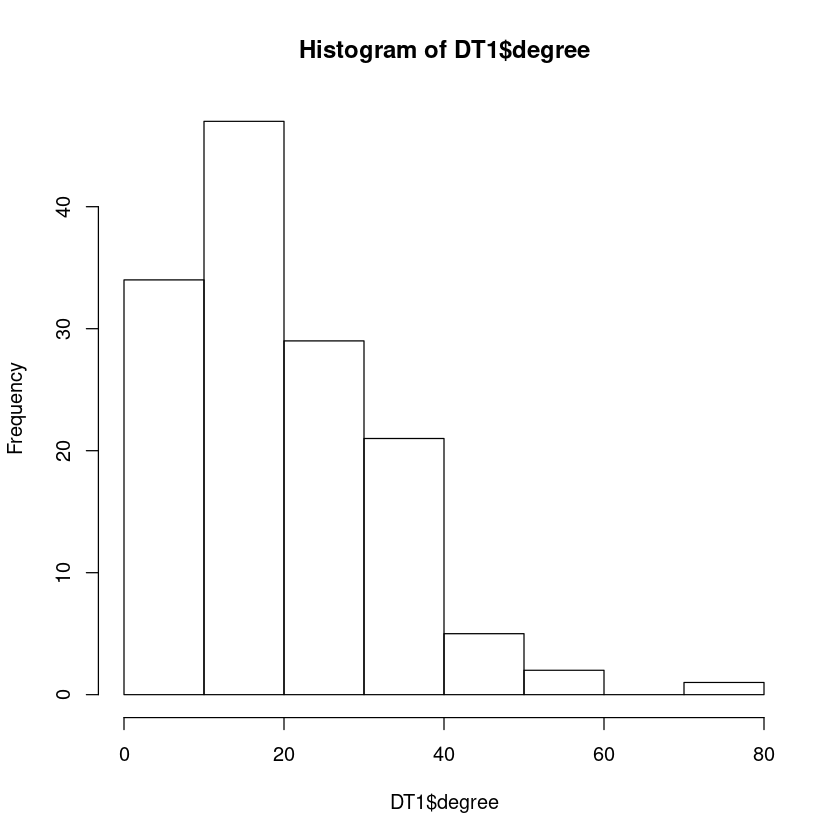

In [17]:
hist(DT1$degree)

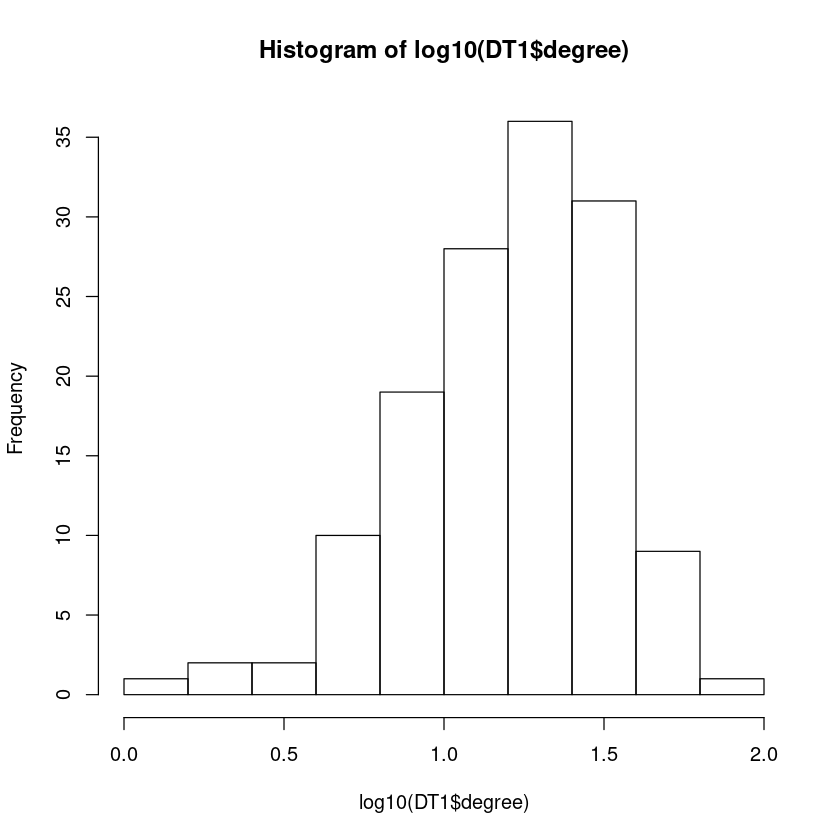

In [18]:
hist(log10(DT1$degree))

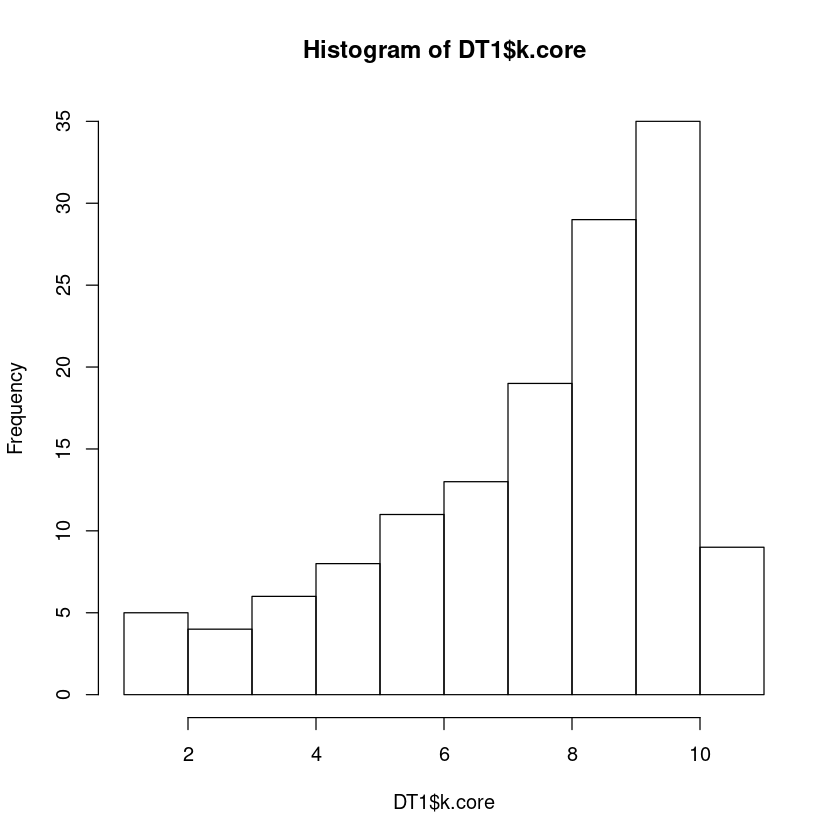

In [19]:
hist(DT1$k.core)

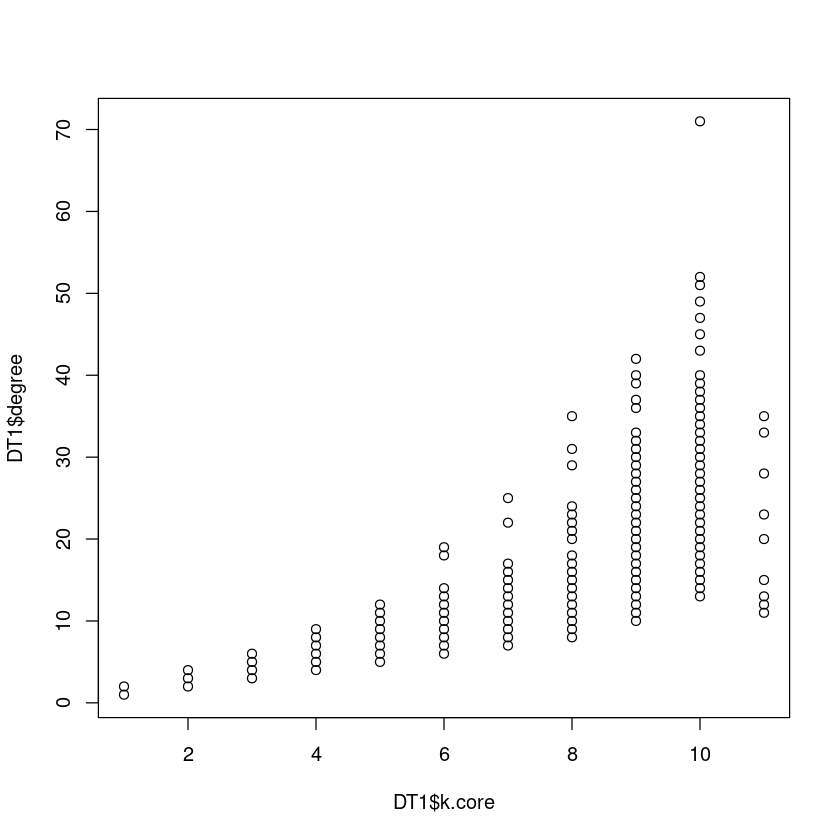

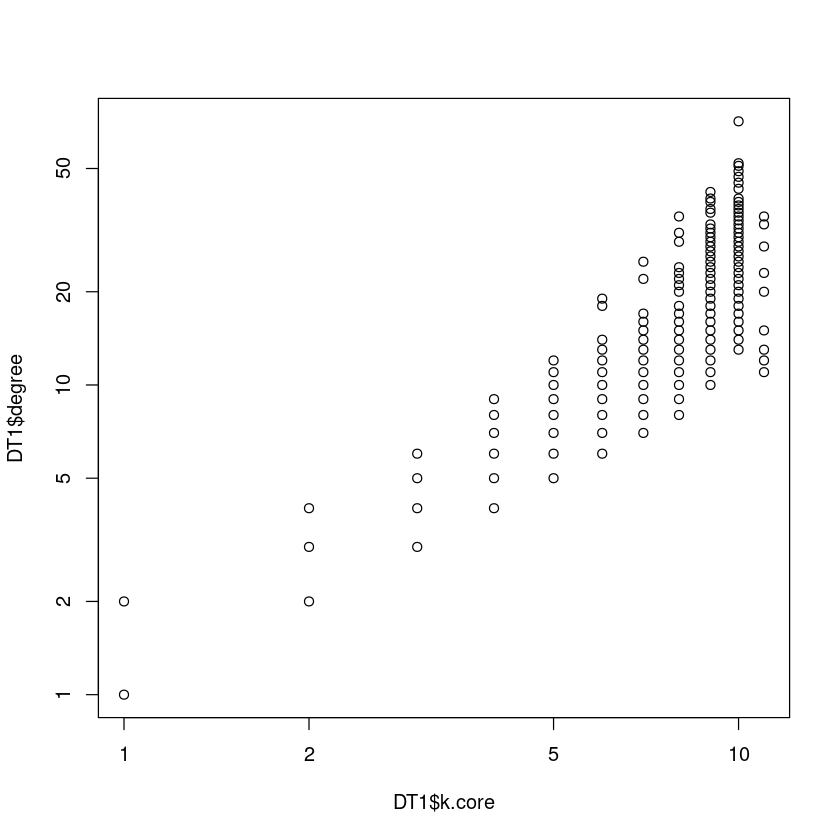

In [20]:
plot(DT1$k.core, DT1$degree)
plot(DT1$k.core, DT1$degree, log='xy')


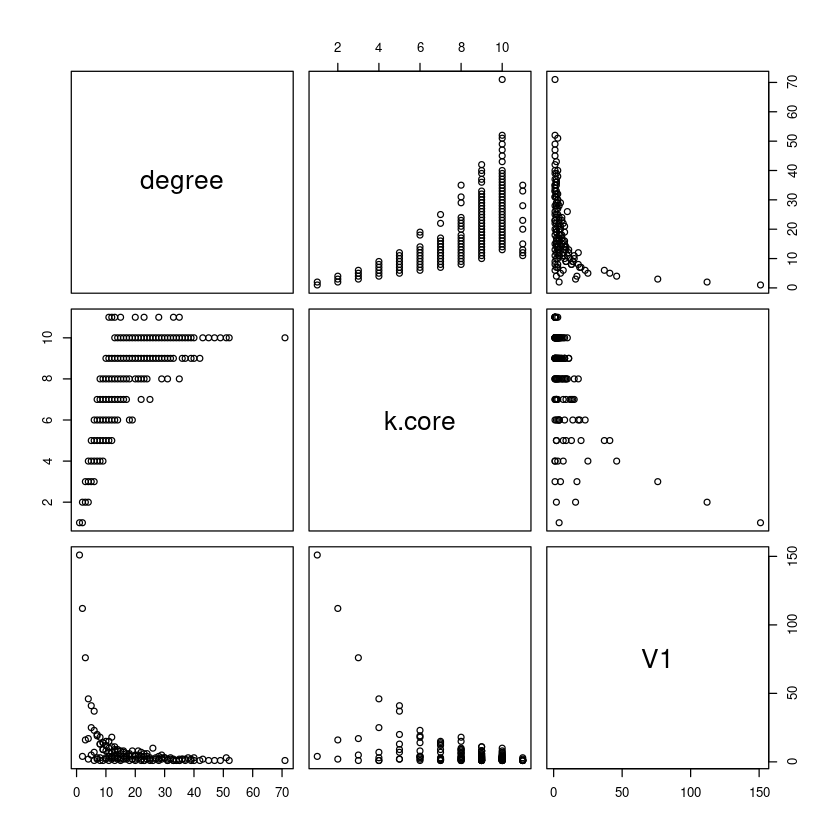

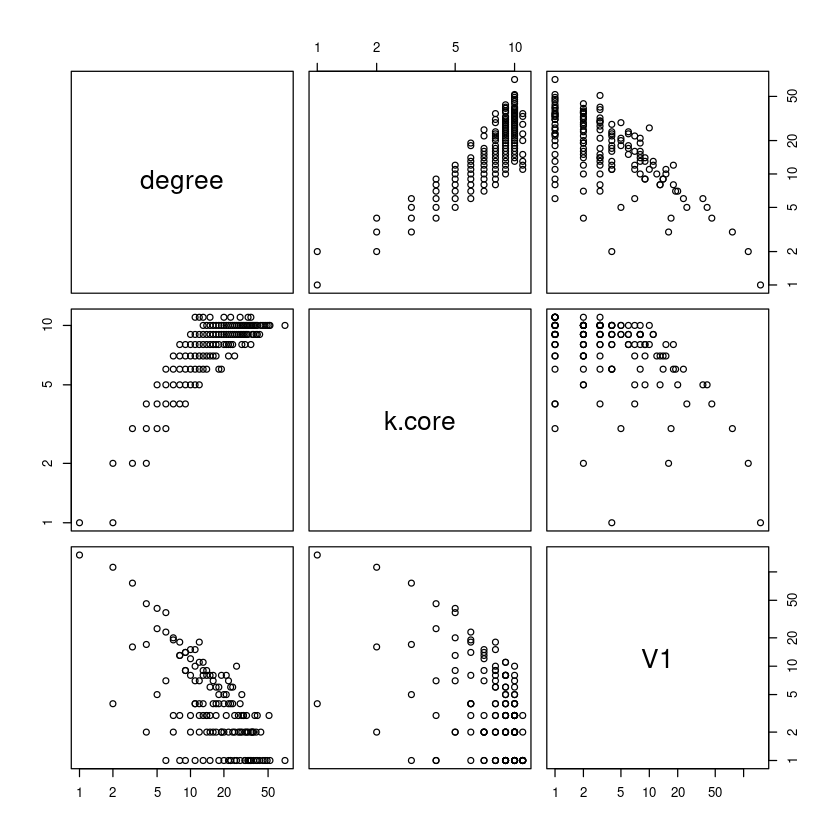

In [21]:
plot(DT1)
plot(DT1, log='xy')

In [22]:
library(RColorBrewer)
rf <- colorRampPalette(rev(brewer.pal(11,'Spectral')))
r <- rf(32)

In [23]:
breaks.degree = 20
breaks.k.core = 10

In [24]:
multiplot <- function(..., plotlist = NULL, file, cols = 1, layout = NULL) {
  require(grid)

  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  if (is.null(layout)) {
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                 ncol = cols, nrow = ceiling(numPlots/cols))
}

if (numPlots == 1) {
print(plots[[1]])

} else {
grid.newpage()
pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

for (i in 1:numPlots) {
  matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

  print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                  layout.pos.col = matchidx$col))
 }
}
 }

https://stackoverflow.com/questions/8615530/place-title-of-multiplot-panel-with-ggplot2

In [79]:
library(ggplot2)
library('scales')

X<-DT1$k.core
Y<-DT1$degree

breaks.degree = 20
breaks.k.core = 10

h1 <-ggplot(DT1, aes(x=k.core)) + 
    geom_histogram(aes(y = stat(count / sum(count))),bins = breaks.k.core, color="black", fill="white") + 
    scale_x_continuous(position='top')+
    labs(y = "Frequency")+
    theme_bw() +theme(axis.title.x=element_blank(),)
    #axis.text.x=element_blank(),
    #axis.ticks.x=element_blank(),)


h2 <-ggplot(DT1, aes(x=degree)) + 
    geom_histogram(aes(y = stat(count / sum(count))),bins = breaks.degree, color="black", fill="white") + 
    scale_x_continuous(trans = "log10", position='top')+
    theme_bw() +
    labs(y = "Frequency")+
    theme(axis.title.y=element_blank(),)+
    #axis.text.y=element_blank(),
    #axis.ticks.y=element_blank())
    coord_flip()


norm<-length(X)
X<-DT1$k.core
Y<-DT1$degree

# Default call (as object)
p <- ggplot(DT1, aes(X,Y))
#h3 <- p + stat_bin2d()
#h3/

# Default call (using qplot)
#qplot(X,Y,data=DT1, geom='bin2d')

# Add colouring and change bins
h3 <- p + 
    stat_bin2d(bins=c(breaks.k.core,breaks.degree)) + 
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x), labels = trans_format("log10", math_format(10^.x))) +
    scale_fill_gradientn(colours=r, breaks = 0:7, labels = percent(1/norm*0:7)) +
                                        theme_bw()+
    theme(legend.position = c(0.1, 0.8),legend.background = element_rect(fill="#ffffff00", size=0.5, linetype="solid")) +
    labs(x = TeX('$k_S$'), y="k")

                  
# Log scaling
#h3 <- p + stat_bin2d(bins=10) + scale_fill_gradientn(colours=r, trans="log")
#h3
#h1
#h2
#h3
#multiplot(h1,h3,NA,h2, cols = 2)
#grid.arrange(h1,NA,h2,h3,
#            layout_matrix = matrix(c(1,1,2,3,3,4,3,3,4), ncol=3, byrow=TRUE))


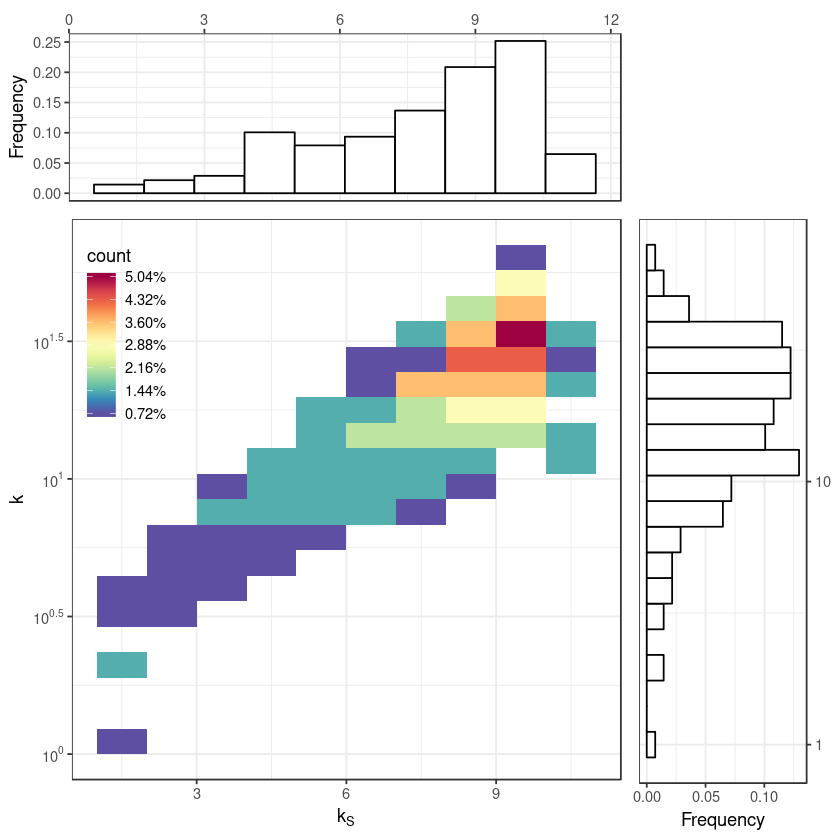

In [80]:
library(gridExtra)

p <- ggplot() + theme_bw()+
  theme(#axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()) 

grid.arrange(h1,p,h3,h2,
            layout_matrix = matrix(c(1,1,1,2,
                                     3,3,3,4,
                                     3,3,3,4,
                                     3,3,3,4), ncol=4, byrow=TRUE))


In [78]:
X<-DT1$k.core
Y<-log10(DT1$degree)
                  
#h2$counts = log(h2$counts, 2)
top <- max(h1$counts, h2$counts)

k <- kde2d(X, Y, n=100)

# margins
oldpar <- par()
par(mar=c(3,3,1,1))
layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1), c(1,3))
#k<-filled.contour(k,color.palette=colorRampPalette(c('white','blue','yellow','red','darkred')))
#k <- h3
image(k,) #plot the image
#h3
par(mar=c(0,2,1,0))
barplot(h1$counts, axes=T, ylim=c(0, top), space=0, col='grey')
par(mar=c(2,0,0.5,1))
barplot(h2$counts, axes=T, xlim=c(0, top), space=0, col='grey', horiz=T)

Warning message in max(h1$counts, h2$counts):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in barplot.default(h1$counts, axes = T, ylim = c(0, top), space = 0, : 'height' must be a vector or a matrix


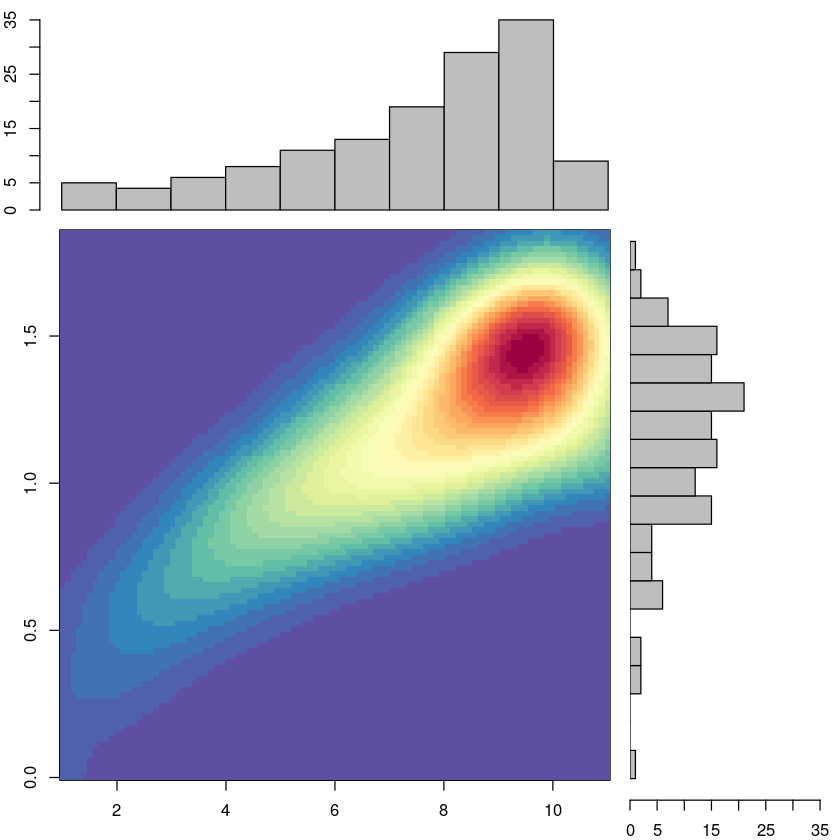

In [28]:
X<-DT1$k.core
Y<-log10(DT1$degree)



h1 <- hist(X, breaks=breaks.k.core, plot=F)
h2 <- hist(Y, breaks=breaks.degree, plot=F)
#h2$counts = log(h2$counts, 2)
top <- max(h1$counts, h2$counts)

k <- kde2d(X, Y, n=100)

# margins
oldpar <- par()
par(mar=c(3,3,1,1))
layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1), c(1,3))
#k<-filled.contour(k,color.palette=colorRampPalette(c('white','blue','yellow','red','darkred')))
image(k, col=r) #plot the image

par(mar=c(0,2,1,0))
barplot(h1$counts, axes=T, ylim=c(0, top), space=0, col='grey')
par(mar=c(2,0,0.5,1))
barplot(h2$counts, axes=T, xlim=c(0, top), space=0, col='grey', horiz=T)

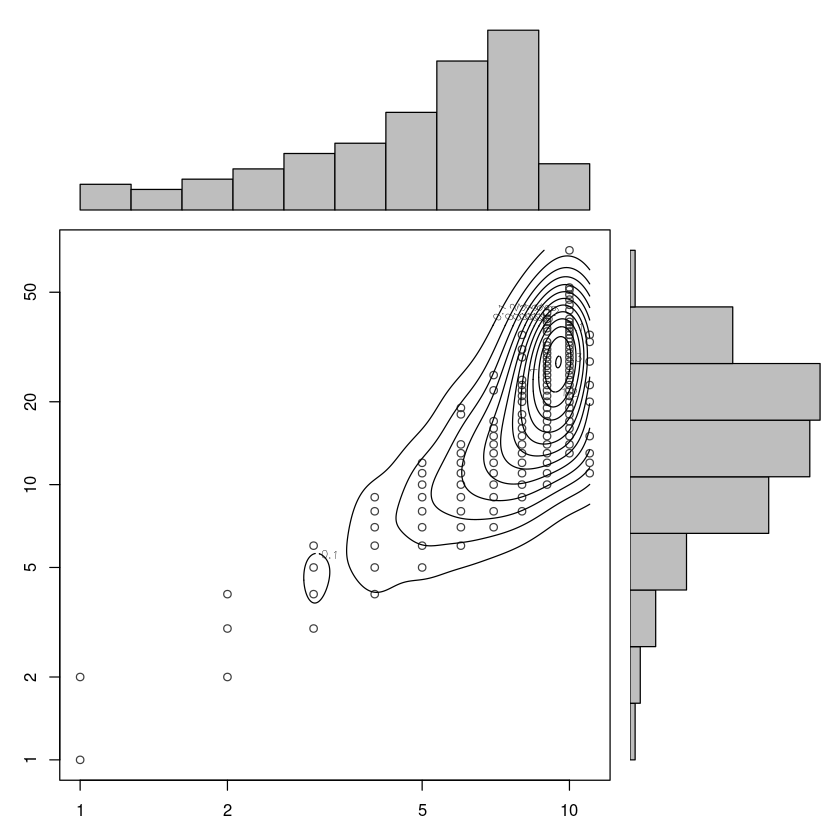

In [26]:
X<-DT1$k.core
Y<-DT1$degree

h1 <- hist(X, breaks=11, plot=F)
h2 <- hist(log(Y), breaks=10, plot=F)
#h2$counts = log(h2$counts, 2)
top <- max(c(h1$counts, h2$counts))

k <- kde2d(log(X), log(Y), n=1500)

# margins
oldpar <- par()
par(mar=c(3,3,1,1))
layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1), c(1,3), TRUE)
plot(X, Y, xlab="", ylab="", log="xy", col="grey25")
contour(exp(k$x), exp(k$y), k$z, add=TRUE)
#image(k,) #plot the image
par(mar=c(0,3,1,1))
barplot(h1$counts, axes=F, ylim=c(0, top), space=0, col='grey')
par(mar=c(3,0,1,1))
barplot(h2$counts, axes=F, xlim=c(0, top), space=0, col='grey', horiz=T)

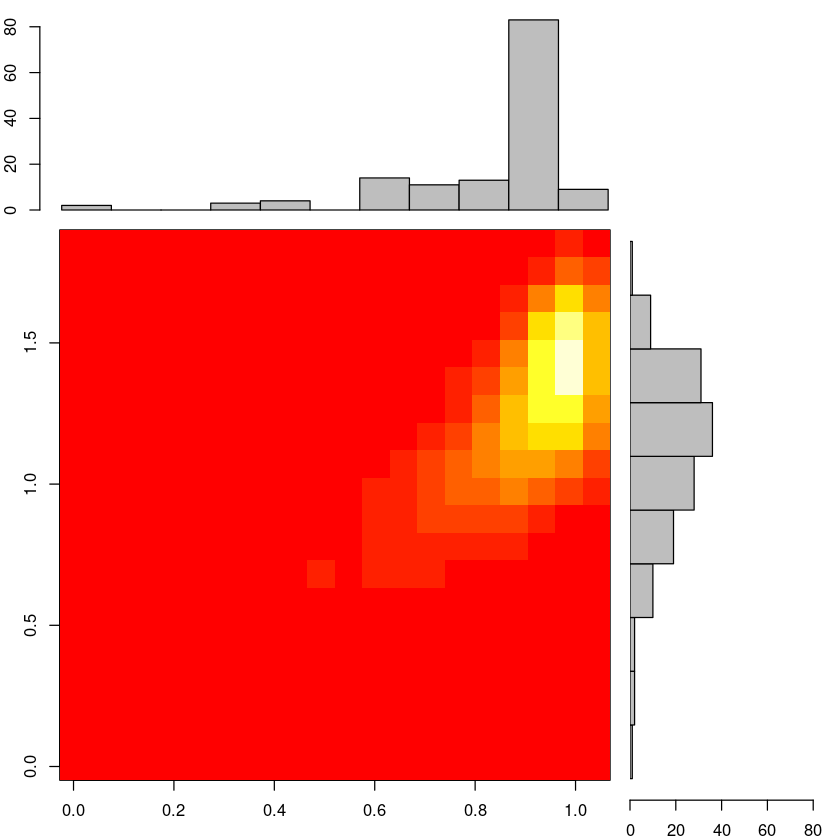

In [27]:
X<-log10(DT1$k.core)
Y<-log10(DT1$degree)

h1 <- hist(X, breaks=11, plot=F)
h2 <- hist(Y, breaks=10, plot=F)
#h2$counts = log(h2$counts, 2)
top <- max(h1$counts, h2$counts)

k <- kde2d(X, Y, n=20)

# margins
oldpar <- par()
par(mar=c(3,3,1,1))
layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1), c(1,3))
#k<-filled.contour(k,color.palette=colorRampPalette(c('white','blue','yellow','red','darkred')))
image(k,) #plot the image

par(mar=c(0,2,1,0))
barplot(h1$counts, axes=T, ylim=c(0, top), space=0, col='grey')
par(mar=c(2,0,0.5,1))
barplot(h2$counts, axes=T, xlim=c(0, top), space=0, col='grey', horiz=T)

In [20]:
X<-df$'k-core'
Y<-df$degree

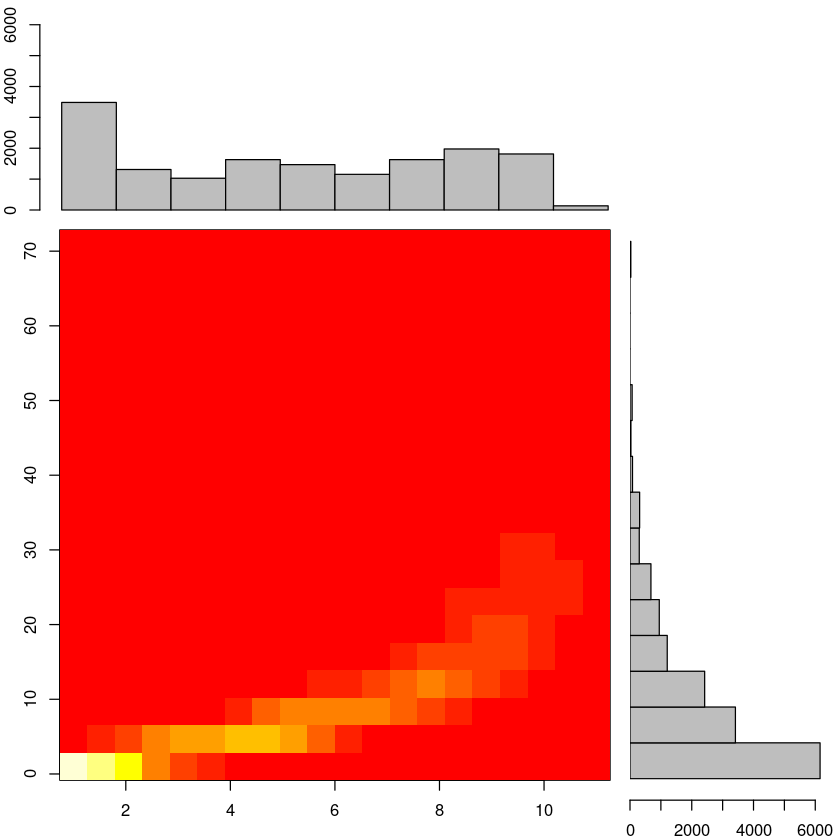

In [25]:
h1 <- hist(X, breaks=11, plot=F)
h2 <- hist(Y, breaks=10, plot=F)
#h2$counts = log(h2$counts, 2)
top <- max(h1$counts, h2$counts)

k <- kde2d(X, Y, n=20)

# margins
oldpar <- par()
par(mar=c(3,3,1,1))
layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1), c(1,3))
#k<-filled.contour(k,color.palette=colorRampPalette(c('white','blue','yellow','red','darkred')))
image(k,) #plot the image

par(mar=c(0,2,1,0))
barplot(h1$counts, axes=T, ylim=c(0, top), space=0, col='grey')
par(mar=c(2,0,0.5,1))
barplot(h2$counts, axes=T, xlim=c(0, top), space=0, col='grey', horiz=T)

https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/kde2d.html

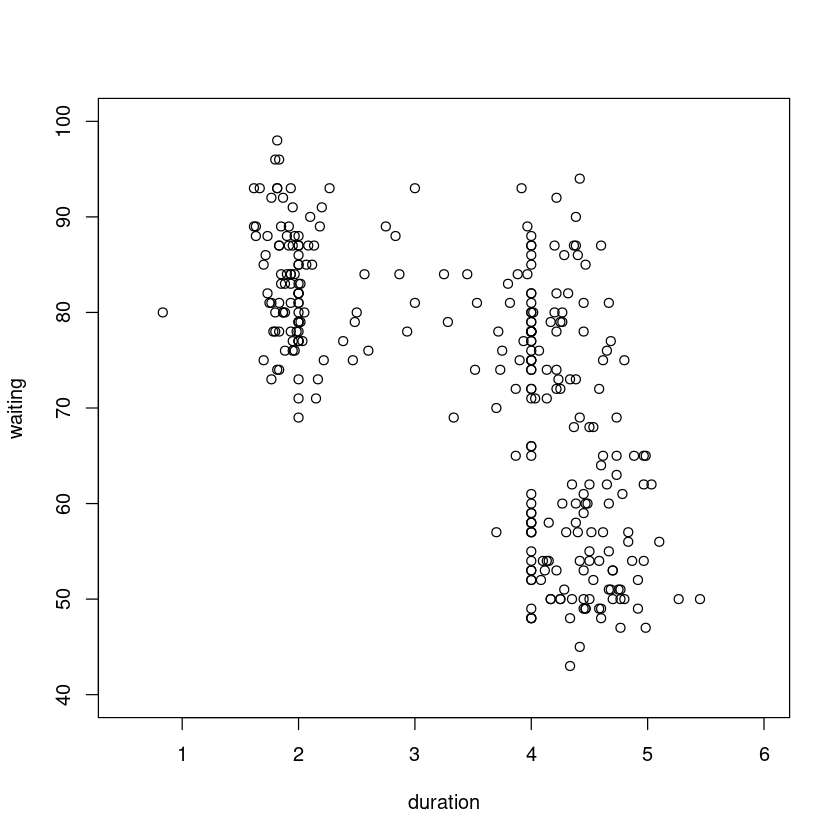

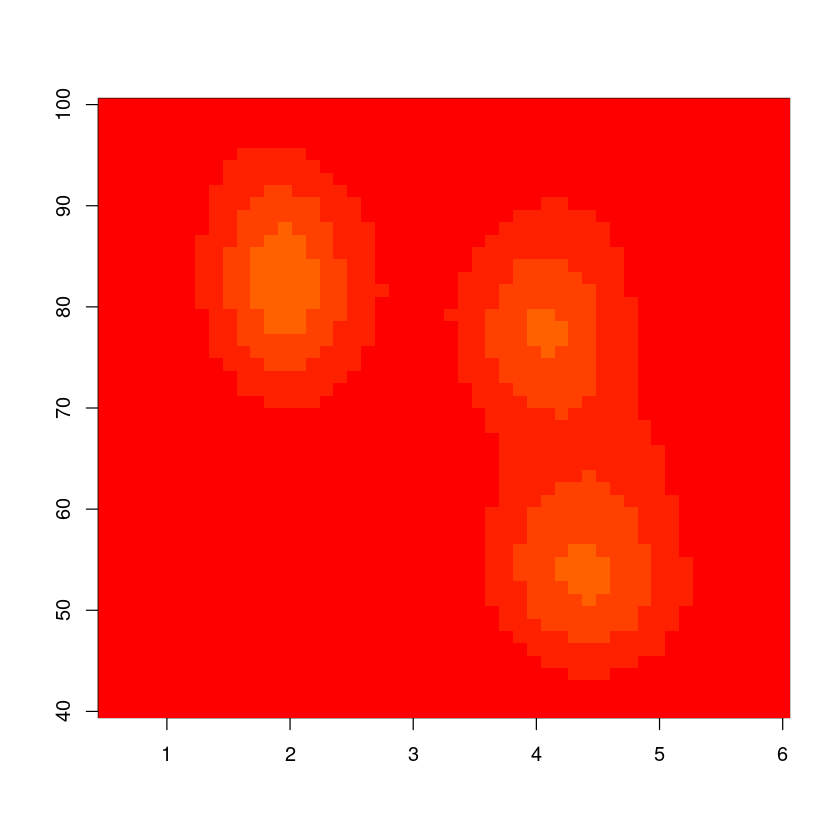

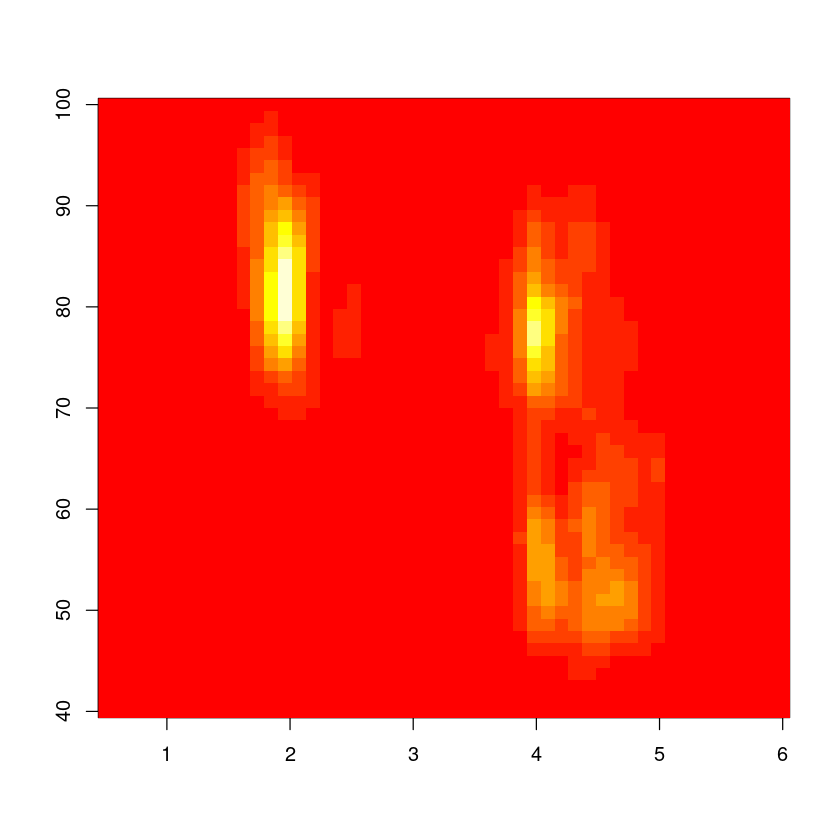

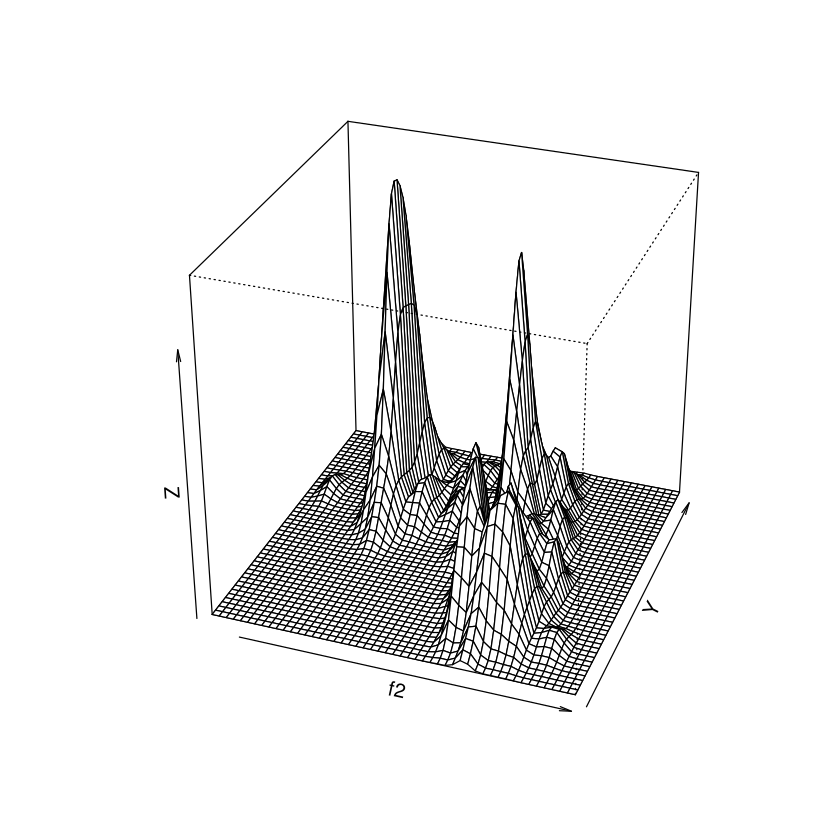

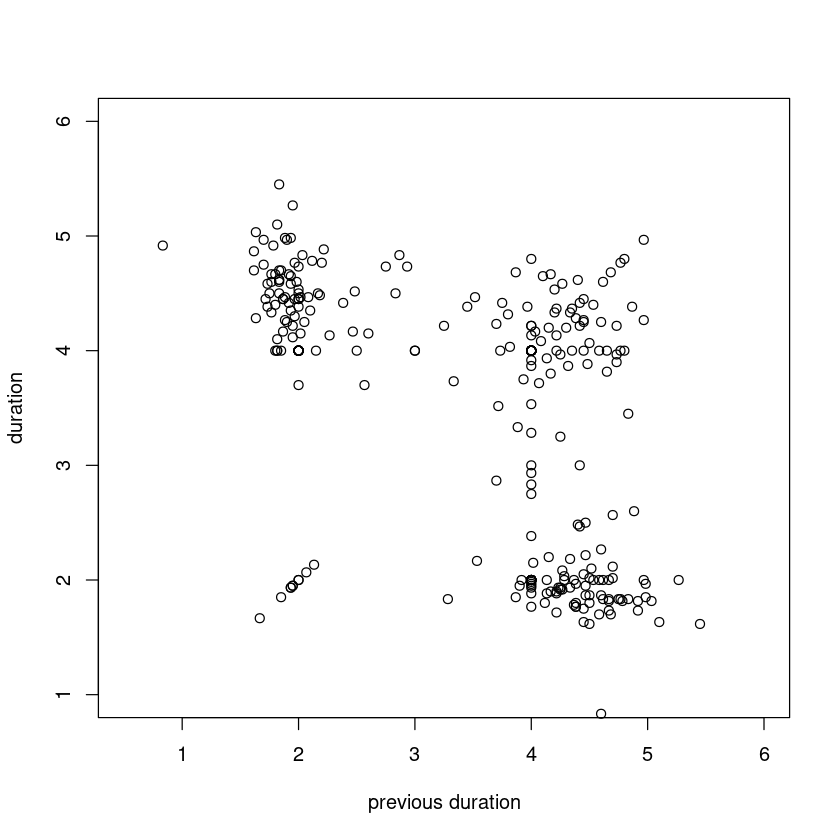

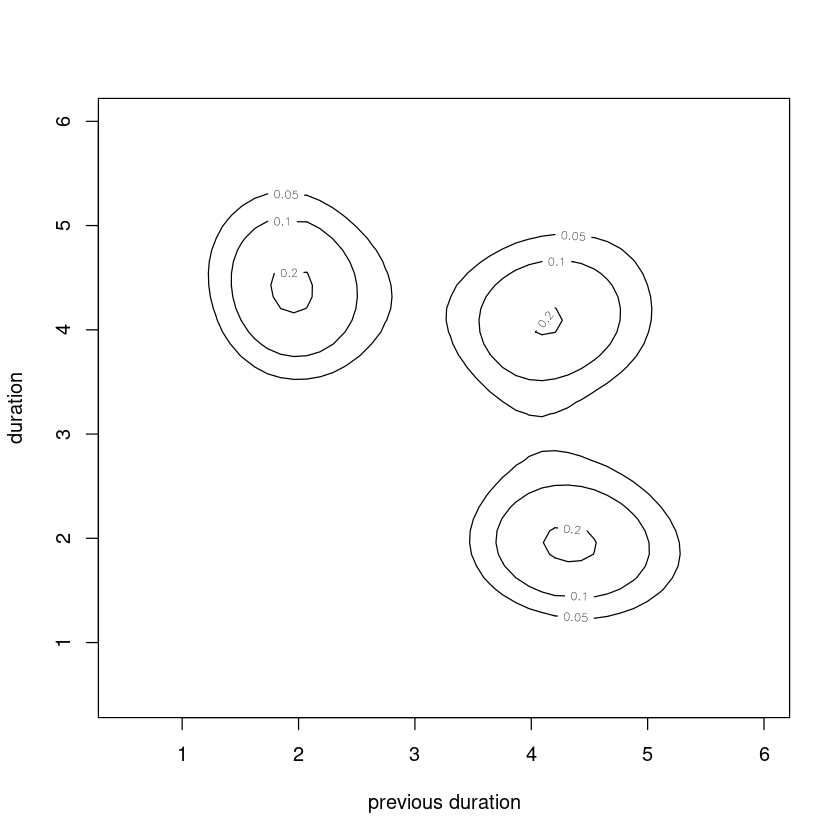

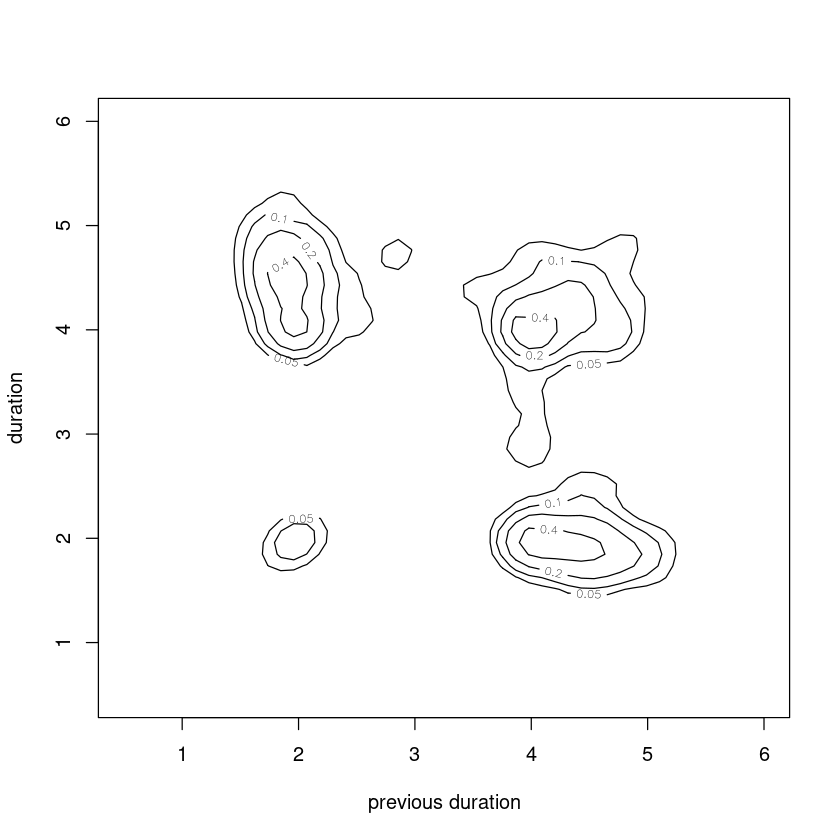

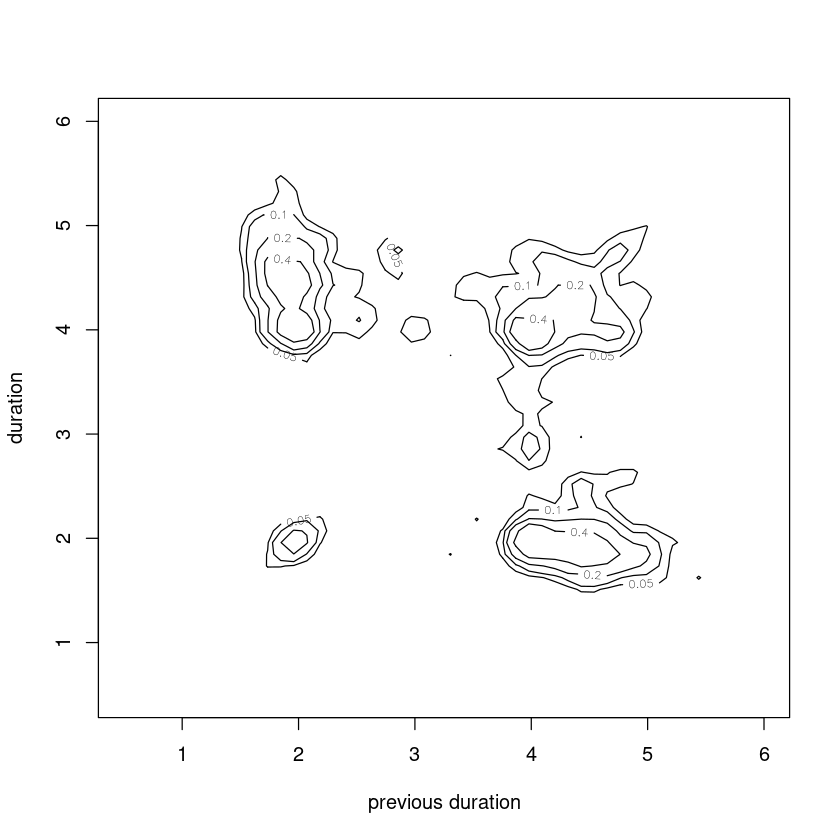

In [117]:
attach(geyser)
plot(duration, waiting, xlim = c(0.5,6), ylim = c(40,100))
f1 <- kde2d(duration, waiting, n = 50, lims = c(0.5, 6, 40, 100))
image(f1, zlim = c(0, 0.05))
f2 <- kde2d(duration, waiting, n = 50, lims = c(0.5, 6, 40, 100),
            h = c(width.SJ(duration), width.SJ(waiting)) )
image(f2, zlim = c(0, 0.05))
persp(f2, phi = 30, theta = 20, d = 5)

plot(duration[-272], duration[-1], xlim = c(0.5, 6),
     ylim = c(1, 6),xlab = "previous duration", ylab = "duration")
f1 <- kde2d(duration[-272], duration[-1],
            h = rep(1.5, 2), n = 50, lims = c(0.5, 6, 0.5, 6))
contour(f1, xlab = "previous duration",
        ylab = "duration", levels  =  c(0.05, 0.1, 0.2, 0.4) )
f1 <- kde2d(duration[-272], duration[-1],
            h = rep(0.6, 2), n = 50, lims = c(0.5, 6, 0.5, 6))
contour(f1, xlab = "previous duration",
        ylab = "duration", levels  =  c(0.05, 0.1, 0.2, 0.4) )
f1 <- kde2d(duration[-272], duration[-1],
            h = rep(0.4, 2), n = 50, lims = c(0.5, 6, 0.5, 6))
contour(f1, xlab = "previous duration",
        ylab = "duration", levels  =  c(0.05, 0.1, 0.2, 0.4) )
detach("geyser")